In [23]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.utils import shuffle
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

In [24]:
data = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\data-final.csv", delimiter='\t')

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


In [25]:
data.isnull().values.sum()
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Number of participants after eliminating missing values:  1013481


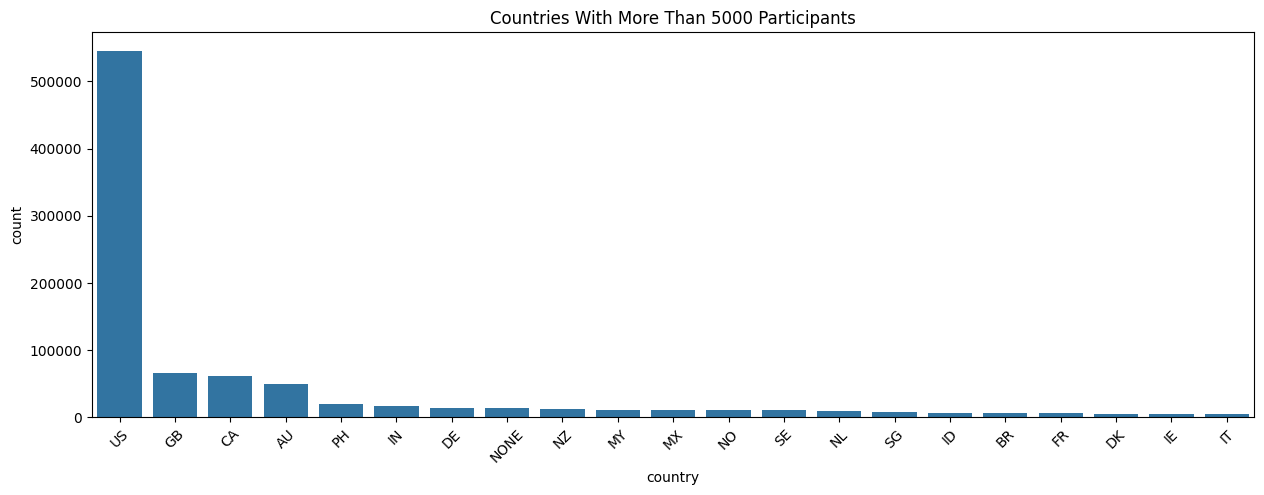

In [26]:
data.columns = data.columns.str.strip()
countries = data['country'].value_counts().reset_index()
countries.columns = ['country', 'count'] 
countries_5000 = countries[countries['count'] >= 5000]

# Plot
plt.figure(figsize=(15, 5))
plt.title('Countries With More Than 5000 Participants')
sns.barplot(data=countries_5000, x='country', y='count')
plt.xticks(rotation=45)
plt.show()

In [27]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [28]:
from sklearn.cluster import KMeans

df_model = data.drop('country', axis=1)

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [29]:
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,1
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,4
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,4
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,3
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,1


In [30]:
df_model.Clusters.value_counts()

Clusters
0    226041
4    211745
1    211318
2    198211
3    166166
Name: count, dtype: int64

In [31]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.456714,1.910330,3.797944,2.498733,4.044775,1.828416,3.659562,2.761397,3.770944,2.993687,3.797948,2.936865,4.233847,2.418287,3.279794,3.454347,3.797112,3.445154,3.646710,3.163307,2.162484,4.272375,2.659491,4.177853,2.004451,3.991599,1.858415,3.894090,4.125849,3.844466,2.950009,3.614778,3.836167,3.240487,2.227910,3.532085,3.450440,2.831327,2.937405,3.475082,3.739653,2.114877,4.247159,1.965360,3.957994,1.771024,3.962684,3.375600,4.185422,4.202547
1,3.458778,1.957902,4.332423,2.232739,4.254886,1.674803,3.872604,2.823053,3.728755,2.529775,2.323129,3.820933,3.157899,3.283071,2.112470,1.898101,2.106593,1.673440,2.113488,1.718424,1.891136,4.429552,1.822585,4.250286,1.856008,3.851347,1.588805,4.099301,4.102982,4.193987,3.724425,2.566563,4.197428,1.888240,3.149462,2.266972,3.877961,1.929192,3.590442,3.878619,3.881979,1.756325,4.079085,1.796828,4.155316,1.656522,4.313603,3.229867,4.097914,4.291050
2,1.813739,3.624476,2.230618,4.050658,2.283259,3.194253,1.746412,4.061929,2.184637,4.470927,4.243952,2.464243,4.498449,2.147923,3.556261,3.856209,3.989774,3.760588,4.006988,3.931734,2.511919,3.325063,2.619658,3.791596,2.596581,3.811958,2.751144,3.398404,3.632856,3.039085,2.789199,3.374555,3.803129,3.493424,2.076600,3.521586,3.546695,3.059331,2.758485,3.298026,3.499715,2.383309,4.062126,2.138822,3.431732,2.089733,3.674811,3.180444,4.271443,3.722074
3,2.184213,3.294609,2.799327,3.410240,2.586293,2.767762,2.116648,3.534129,2.641702,3.793195,2.336037,3.628901,2.989565,2.927404,2.315943,2.002437,2.288717,1.908826,2.565729,2.233483,3.011621,2.942040,2.556329,2.793050,3.135629,2.663854,2.989486,2.863456,2.619663,2.987037,3.151385,2.823809,3.672869,2.399245,2.377069,2.732809,3.383821,2.504225,2.779642,3.343879,3.533274,1.977504,3.613164,2.057755,3.622053,2.042915,3.886788,3.104359,3.701136,3.665846
4,2.120905,3.301457,3.076403,3.668172,2.953619,2.707001,2.199277,4.003433,2.320669,4.140027,3.549047,3.046178,4.182200,2.583712,2.852100,2.835637,2.913547,2.477990,3.016000,2.749812,1.884167,3.934294,1.700635,4.355640,1.985638,4.152122,2.018952,3.982394,4.180448,3.715649,3.835231,2.230282,4.300536,2.033375,3.237403,2.080002,4.171725,2.022929,3.837267,3.893896,3.577199,2.142870,3.902912,2.063978,3.727063,1.965175,4.007032,2.992080,4.273404,3.816765


In [32]:
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.072250,3.417337,3.299107,3.209569,3.352232
1,3.086572,2.420755,3.208599,3.106930,3.325849
2,2.966091,3.645612,3.147826,3.172103,3.245421
3,2.912812,2.519704,2.856217,2.916875,3.120480
4,3.049096,3.020622,3.190994,3.164265,3.246848


In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.733783,-1.083918,1
1,1.066263,3.842139,4
2,0.056649,2.954550,4
3,1.262481,0.159080,3
4,-4.330188,3.341182,1


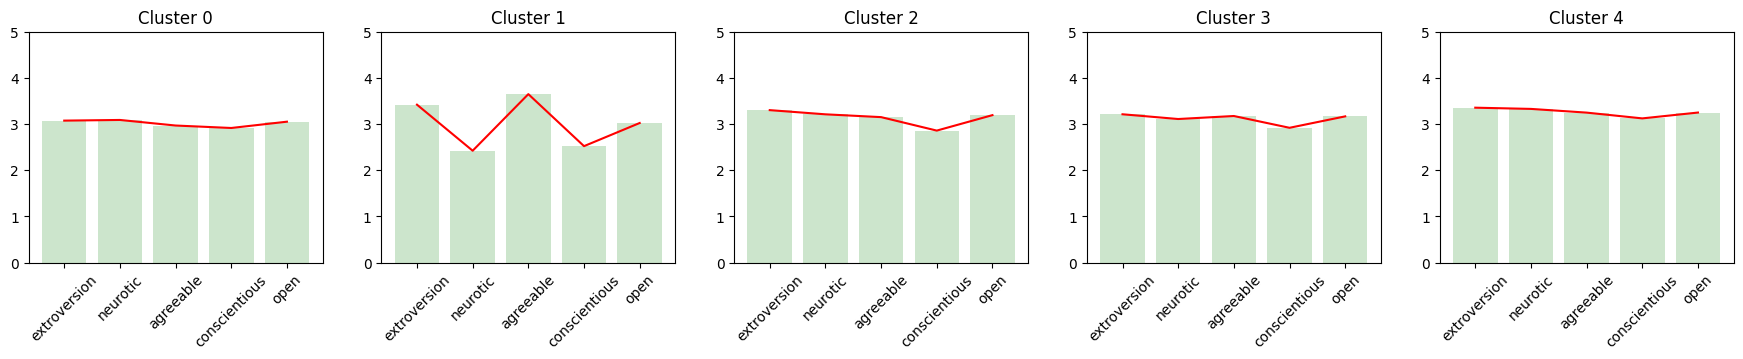

In [34]:
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,5);

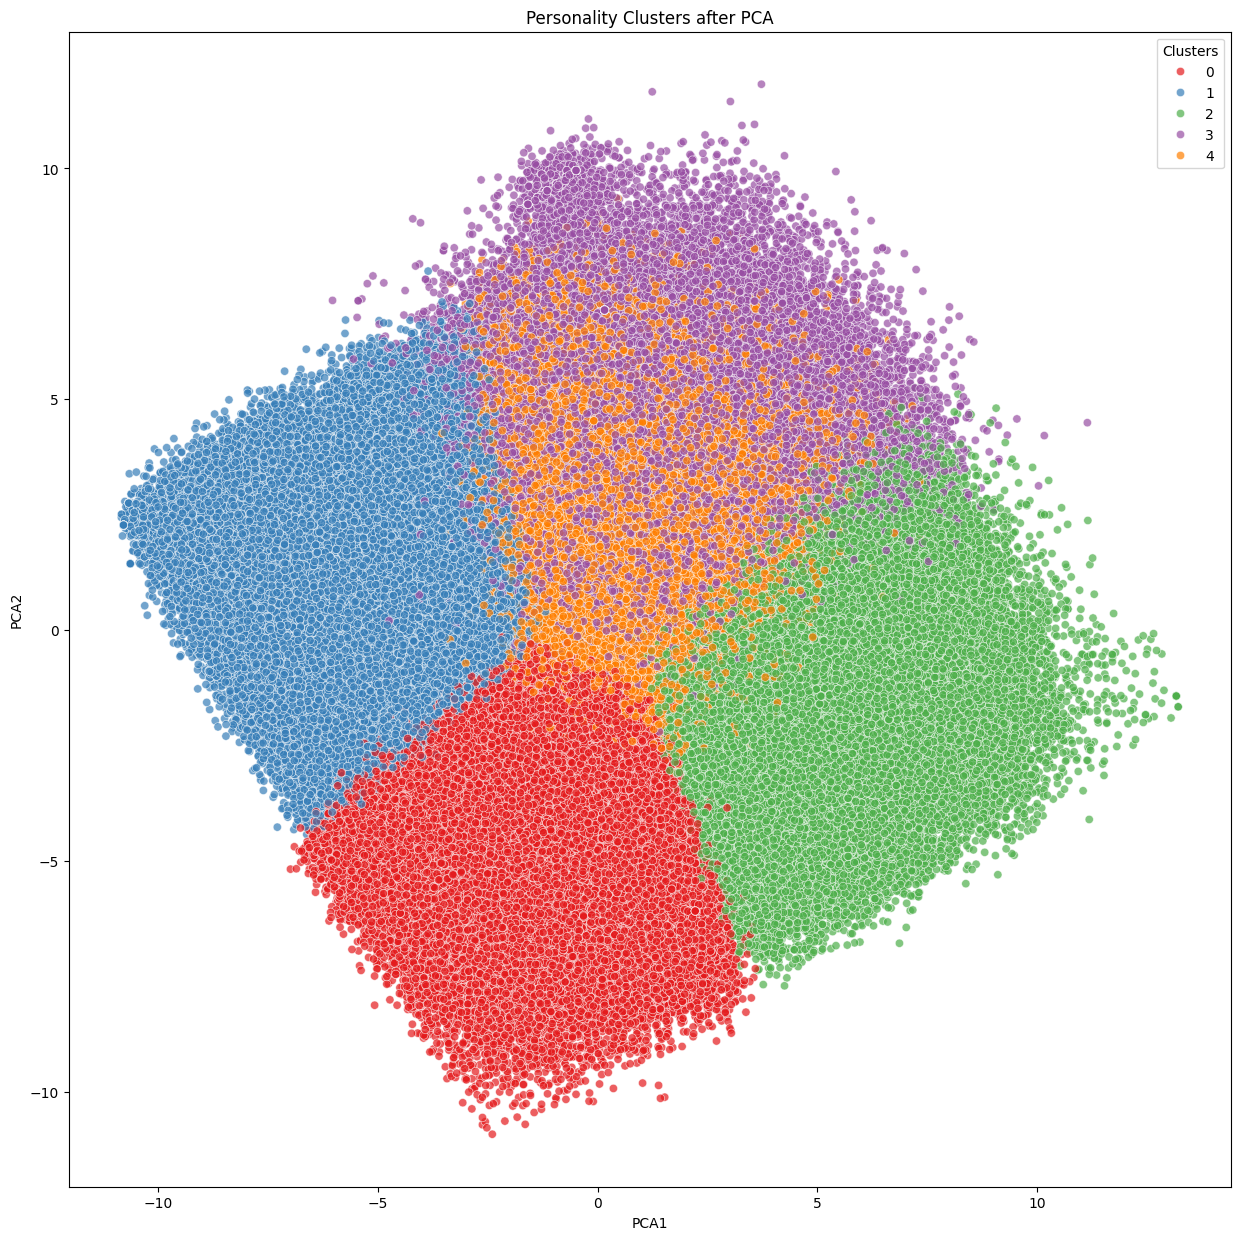

In [35]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set1', alpha=0.7)
plt.title('Personality Clusters after PCA');